In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
#load the data
df = pd.read_excel('counter_current_data.xlsx')

In [21]:
#Split the data into input and output
X = df.iloc[:,0] #Input
y = df.iloc[:,1] #Output

In [22]:
#Convert series to dataframe
X = X.to_frame()
y = y.to_frame()

In [23]:
X

,Alpha
0,1.010000
1,1.011327
2,1.012653
3,1.013980
4,1.015307
...,...
1496,2.994693
1497,2.996020
1498,2.997347
1499,2.998673


In [24]:
y

,Stages
0,82
1,77
2,74
3,70
4,67
...,...
1496,3
1497,3
1498,3
1499,3


In [25]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#Scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [27]:
import joblib
joblib.dump(sc, 'scaler_counter.save')

['scaler_counter.save']

In [28]:
print(X_train_scaled.size)
print(X_test_scaled.size)

1200
301


In [29]:
#Model

In [30]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_dim=1))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                64        
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')

history = model.fit(X_train_scaled,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/100
38/38 [==============================] - 1s 5ms/step - loss: 128.9282 - val_loss: 85.1067
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 119.5346 - val_loss: 74.0464
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 105.0468 - val_loss: 58.3496
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 83.2048 - val_loss: 36.1607
Epoch 5/100
38/38 [==============================] - 0s 3ms/step - loss: 56.6485 - val_loss: 18.9217
Epoch 6/100
38/38 [==============================] - 0s 3ms/step - loss: 42.0806 - val_loss: 15.9303
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 38.7808 - val_loss: 15.9294
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 37.8709 - val_loss: 15.2242
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 37.2406 - val_loss: 15.3774
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 36.4571 - val_

In [33]:
#Model Evaluation
score = model.evaluate(X_test_scaled,y_test,verbose=0)
print('Test Loss:',score)

#Predictions
predictions = model.predict(X_test_scaled)

Test Loss: 2.937520980834961
10/10 [==============================] - 0s 1ms/step


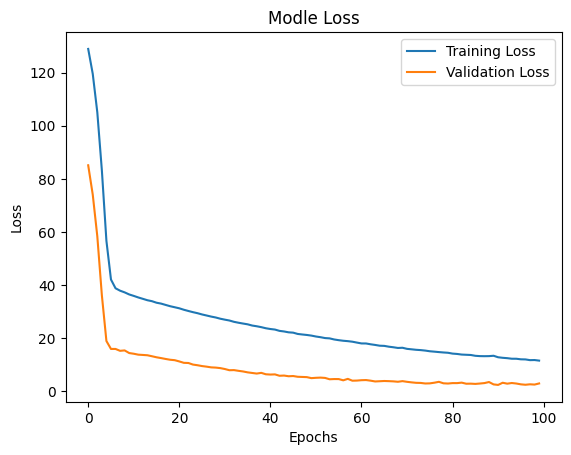

In [34]:
#Plotting the trend of loss with respect to epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Modle Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
#Example
input = 2.5

scaled_input = sc.transform(np.array([[input]]))

predicted_value = model.predict(scaled_input)

predicted_value_original_scale = sc.inverse_transform(predicted_value)

print("Input Value of Alpha:", input)
print("Predicted Stages:", predicted_value[0, 0])


1/1 [==============================] - 0s 37ms/step
Input Value of Alpha: 2.5
Predicted Stages: 3.6774206


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
import os
model.save(os.path.join('model_counter.h5'))

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
